# Ames, Iowa Housing Project
## Notebook 02 - Modeling

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

## Load Data

In [2]:
housing_df = pd.read_pickle('../data/housing_df.pkl')
X = pd.read_pickle('../data/X.pkl')
y = pd.read_pickle('../data/y.pkl')
X_train = pd.read_pickle('../data/X_train.pkl')
X_test = pd.read_pickle('../data/X_test.pkl')
y_train = pd.read_pickle('../data/y_train.pkl')
y_test = pd.read_pickle('../data/y_test.pkl')
X_train_scaled = pd.read_pickle('../data/X_train_scaled.pkl')
X_test_scaled = pd.read_pickle('../data/X_test_scaled.pkl')

## 2. Modeling

Now that I've completed EDA, I can now use the training data to build a model to predict home price from the features.

### A. Benchmarking

As we get started with modeling, we should have some basis for comparison to get a sense of what a 'good' model is for this task.

For this task, I will focus on linear models. I will use the most naive of the linear models, the Linear Regression as the benchmark.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)# Make predictions using the testing set
y_pred = regr.predict(X_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [5]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  3.83043850e+00   1.49664563e-05   3.92219047e+01   6.14277485e-01
   6.21453633e+03   4.85697351e+03   4.15924337e+02   1.08953059e+02
   1.75028914e+00   1.23695871e+01   4.63637940e+00  -2.08449608e+00
   1.49214538e+01   1.65157547e+01   2.18083952e+01  -9.77828450e+00
   2.85460097e+01   2.12336894e+03   2.79343289e+02   2.52151994e+03
   4.26365975e+02  -1.31629999e+03  -1.93968147e+03   1.40190898e+02
   6.03434143e+03   1.96848265e+01   6.44321637e+03   6.35381988e+00
   8.27987272e+00   1.78904854e+01   9.99005500e+00   1.40313361e+01
   3.74063528e+01  -2.04381292e+02   9.19549710e-03  -1.12476569e+02
   1.73403724e+03  -2.04951210e+03   2.17984962e-07  -1.26946793e+04
  -6.11729505e+03  -1.85543594e+03  -1.29385340e+03   1.52411681e+03
   5.13028578e+03   1.91226168e+04   9.64398074e+03  -1.96967502e+03
   7.21619557e+03   2.52607281e+03  -7.63088969e+03  -5.72323050e+03
  -5.82869749e+03  -8.29423567e+02   6.38027694e+03  -2.12487617e+04
   1.05598297e+04 

#### Results Dictionary

I will make a results `list` to hold my results. After each model fit and score, I will add a dictionary of my results to this list using `.append()`. This will give a list of dictionaries. This will come in handy later when turned into a DataFrame.

This is the pattern I will be using:

In [6]:
# Example dict
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

In [7]:
# Pass results into a DataFrame
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


#### Raw Benchmark

In [8]:
results = list()

In [9]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
               

In [10]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

In [11]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.926775
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.794350


#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [12]:
benchmark_raw.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_raw.score(X_train_scaled, y_train)
scaled_test_score = benchmark_raw.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [13]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267746e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.943501e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.267026e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-3.863412e+23


### B. Naive Regularization

Next I prepare a seires of fits using the three regularized linear regression models with their defeault settings.

Next, I performed each of these against both the raw and the scaled data. In this section, I fitted six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" I mean using all of the default settings.

In [14]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [15]:
# Instantiate ridge pipeline
pipeline_regr = Pipeline([('scaler',StandardScaler()),
                          ('regr',Ridge())])

In [16]:
# Append ridge() results to list
pipeline_regr.fit(X_train,y_train)
regr_train_score = pipeline_regr.score(X_train_scaled, y_train)
regr_test_score = pipeline_regr.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regr_train_score})
results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regr_test_score})

In [17]:
# Append ridge() scaled results to list
pipeline_regr.fit(X_train_scaled, y_train)
regr_scaled_train_score = pipeline_regr.score(X_train_scaled, y_train)
regr_scaled_test_score = pipeline_regr.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regr_scaled_train_score})
results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regr_scaled_test_score})

In [18]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267746e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.943501e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.267026e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-3.863412e+23
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.625815e+03
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.234357e+03
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.267705e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.018295e-01


In [19]:
# Instantiate ElasticNet pipeline
pipeline_regel = Pipeline([('scaler',StandardScaler()),
                           ('elastic_net',ElasticNet())])

In [20]:
# Append ElasticNet() results to list
pipeline_regel.fit(X_train,y_train)
regel_train_score = pipeline_regel.score(X_train_scaled, y_train)
regel_test_score = pipeline_regel.score(X_test_scaled, y_test)

results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regel_train_score})
results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regel_test_score})

In [21]:
# Append ElasticNet() scaled results to list
pipeline_regel.fit(X_train_scaled, y_train)
regel_scaled_train_score = pipeline_regel.score(X_train_scaled, y_train)
regel_scaled_test_score = pipeline_regel.score(X_test_scaled, y_test)

results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regel_scaled_train_score})
results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regel_scaled_test_score})

In [22]:
# Instantiate lasso pipeline
pipeline_regl = Pipeline([('scaler',StandardScaler()),
                          ('lasso',Lasso())])

In [23]:
# Append lasso() results to list
pipeline_regl.fit(X_train,y_train)
regl_train_score = pipeline_regl.score(X_train, y_train)
regl_test_score = pipeline_regl.score(X_test, y_test)

results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regl_train_score})
results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regl_test_score})

In [24]:
# Append scaled lasso() results to list
pipeline_regl.fit(X_train,y_train)
regl_train_scaled_score = pipeline_regl.score(X_train_scaled, y_train)
regl_test_scaled_score = pipeline_regl.score(X_test_scaled, y_test)

results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regl_train_scaled_score})
results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regl_test_scaled_score})

In [25]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267746e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.943501e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.267026e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-3.863412e+23
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.625815e+03
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.234357e+03
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.267705e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.018295e-01
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-2.883366e+01
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.686255e+00


**Note:** I see warnings here. As I are in an exploration phase with the model, this is acceptable.

In [26]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267746e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.943501e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.267026e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-3.863412e+23
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.625815e+03
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6.234357e+03
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.267705e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.018295e-01
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-2.883366e+01
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.686255e+00


In [27]:
# Display just the raw test results
results_df[(results_df['preprocessing'] == 'raw') & (results_df['dataset'] == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.794350
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6234.356712
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.686255
13,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.801916


In [28]:
# Display just the scaled test results
results_df[(results_df['preprocessing'] == 'scaled') & (results_df['dataset'] == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-3.863412e+23
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.018295e-01
11,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,8.450370e-01
15,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-6.758608e+03


In [29]:
# Display just the Benchmark models
results_df[(results_df['name'] == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.267746e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,7.943501e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.267026e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-3.863412e+23


In [30]:
# Display just the Ridge model
results_df[(results_df['name'] == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6625.814843
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-6234.356712
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,0.926771
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,0.801830


In [31]:
# Display just the Lasso models
results_df[(results_df['name'] == 'lasso')]

,dataset,model,name,preprocessing,score
12,train,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.926773
13,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.801916
14,train,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-7171.463089
15,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-6758.607861


In [32]:
# Display just the ElasticNet models
results_df[(results_df['name'] == 'elasticnet')]

,dataset,model,name,preprocessing,score
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-28.833655
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-8.686255
10,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,0.897368
11,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,0.845037


### C. Cross Validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [33]:
cv_results = list()

In [34]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [35]:
alphas = np.logspace(-1,2,4)
alphas

array([   0.1,    1. ,   10. ,  100. ])

#### Display Just the Raw Test Results

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Find an optimal value for Ridge regression alpha using RidgeCV
optimal_ridge = RidgeCV(alphas=alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

10.0


In [38]:
# Cross-validate the Ridge regression R^2 with the optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.8596552   0.89370859  0.86599276  0.84844507  0.87132759  0.70349736
  0.82842041  0.66588393  0.89362621  0.87850394]
0.830906108332


In [39]:
# Find an optimal value for Lasso regression alpha using RidgeCV
optimal_lasso = LassoCV(alphas=alphas, cv=10)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

100.0


In [40]:
# Cross-validate the Lasso regression R^2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[ 0.85920434  0.88246169  0.87318032  0.84293776  0.8771647   0.68106148
  0.8301548   0.63861245  0.89364272  0.87452676]
0.825294701014


In [41]:
# Find an optimal value for ElasticNet regression alpha using RidgeCV
optimal_elasticnet = ElasticNetCV(alphas=alphas, cv=10)
optimal_elasticnet.fit(X_train, y_train)

print(optimal_elasticnet.alpha_)

0.1


In [42]:
# Cross-validate the ElasticNet regression R^2 with the optimal alpha
elasticnet = ElasticNet(alpha=optimal_lasso.alpha_)

elasticnet_scores = cross_val_score(elasticnet, X, y, cv=10)

print(elasticnet_scores)
print(np.mean(elasticnet_scores))

[ 0.74580277  0.76235214  0.78474608  0.72011531  0.79305179  0.44165684
  0.70602925  0.46488882  0.78552128  0.67654342]
0.688070769883


#### Get Coefficients

In [43]:
# Get lasso coefficients
lasso.fit(X_train, y_train)

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
145,106728.500919,-106728.500919,roof_matl_ClyTile
122,22547.798386,-22547.798386,condition_2_PosN
100,17080.041402,17080.041402,neighborhood_NoRidge
101,16628.724116,16628.724116,neighborhood_NridgHt
89,14988.822316,14988.822316,neighborhood_Crawfor
106,13876.053276,13876.053276,neighborhood_Somerst
126,11169.321654,11169.321654,bldg_type_1Fam
4,8376.333297,8376.333297,overall_qual
26,8119.403570,8119.403570,garage_cars
39,8100.115457,-8100.115457,ms_subclass_160


In [44]:
# Get ridge coefficients
ridge.fit(X_train, y_train)

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,abs_coef,coef,variable
145,19976.352353,-19976.352353,roof_matl_ClyTile
122,17041.997236,-17041.997236,condition_2_PosN
100,15205.245668,15205.245668,neighborhood_NoRidge
101,14961.381916,14961.381916,neighborhood_NridgHt
106,12792.470947,12792.470947,neighborhood_Somerst
294,12159.786854,-12159.786854,pool_qc_Gd
89,11919.770040,11919.770040,neighborhood_Crawfor
90,11830.358683,-11830.358683,neighborhood_Edwards
190,11512.831301,-11512.831301,exter_qual_Ex
26,9708.118826,9708.118826,garage_cars


In [45]:
# Get elasticnet coefficients
elasticnet.fit(X_train, y_train)

elasticnet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(elasticnet.coef_)})

elasticnet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elasticnet_coefs.head(20)

,abs_coef,coef,variable
6,466.680037,326.768627,year_built
7,451.620056,108.870370,year_remod/add
4,204.124772,7426.567633,overall_qual
5,112.884383,4536.492680,overall_cond
33,90.572254,-31.154576,pool_area
32,76.439229,49.936396,screen_porch
24,75.039484,5809.806506,fireplaces
263,58.726151,-702.173720,fireplace_qu_NA
192,53.134015,7070.451013,exter_qual_Gd
252,49.397388,-3830.491875,kitchen_qual_TA


#### Plotting Coefficients

In [46]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

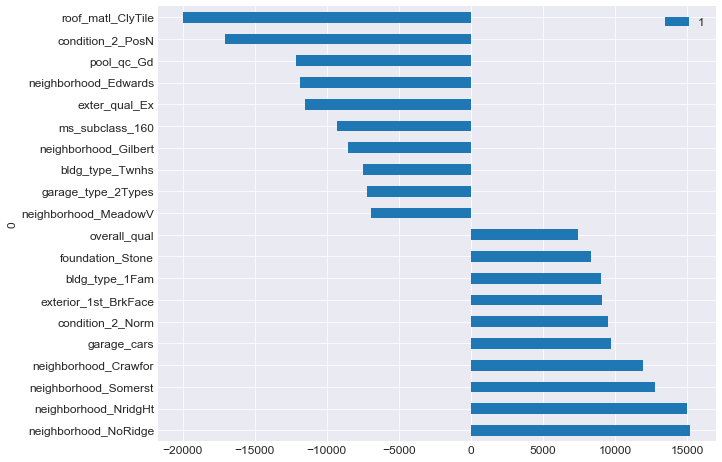

In [47]:
plot_coef(ridge)

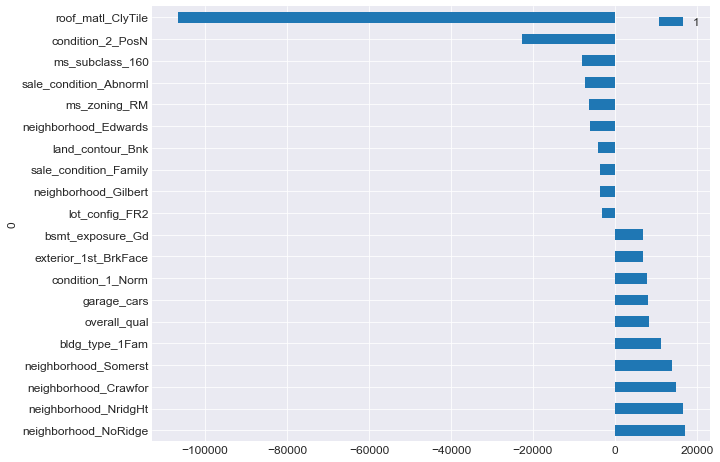

In [48]:
plot_coef(lasso)

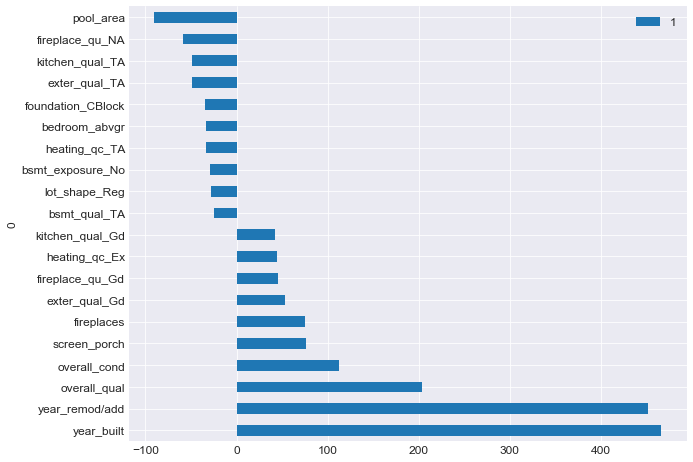

In [49]:
plot_coef(elasticnet)

## Informing Business Value

My models show that the neighborhood a house is in is important. You can see some neighborhoods can add to the sales price while some neighborhoods decrease the price. This makes sense because often times all the houses in a neighborhood are pretty close together and the neighborhood one lives in is a decent indicator of what a home cost.

Thus, it would be best to invest in the neighborhoods (and houses with other features) as shown in the plots above.